# CAMVID

In [1]:
!git clone https://github.com/GeorgeSeif/Semantic-Segmentation-Suite.git
  

Cloning into 'Semantic-Segmentation-Suite'...
remote: Enumerating objects: 3635, done.
remote: Total 3635 (delta 0), reused 0 (delta 0), pack-reused 3635
Receiving objects: 100% (3635/3635), 874.39 MiB | 47.52 MiB/s, done.
Resolving deltas: 100% (463/463), done.
Checking out files: 100% (1451/1451), done.


In [0]:
from pathlib import Path
data_path = Path('Semantic-Segmentation-Suite/CamVid')

In [0]:
import pandas as pd
classes = pd.read_csv(data_path / 'class_dict.csv', index_col =0)

In [4]:
classes

,r,g,b
name,,,
Animal,64,128,64
Archway,192,0,128
Bicyclist,0,128,192
Bridge,0,128,64
Building,128,0,0
Car,64,0,128
CartLuggagePram,64,0,192
Child,192,128,64
Column_Pole,192,192,128


In [5]:
import numpy as np
np.array(classes.loc['Wall', :])

array([ 64, 192,   0])

In [6]:
list(classes.loc['Wall', :])

[64, 192, 0]

In [7]:
classes.index

Index(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight',
       'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void',
       'Wall'],
      dtype='object', name='name')

In [8]:
for i, v in enumerate(classes.index):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [0]:
classes_dict = {}
for cl in classes.index:
  classes_dict[cl] = list(classes.loc[cl, :])

In [0]:
cls2rgb = {cl:list(classes.loc[cl, :]) for cl in classes.index}

In [11]:
cls2rgb

{'Animal': [64, 128, 64],
 'Archway': [192, 0, 128],
 'Bicyclist': [0, 128, 192],
 'Bridge': [0, 128, 64],
 'Building': [128, 0, 0],
 'Car': [64, 0, 128],
 'CartLuggagePram': [64, 0, 192],
 'Child': [192, 128, 64],
 'Column_Pole': [192, 192, 128],
 'Fence': [64, 64, 128],
 'LaneMkgsDriv': [128, 0, 192],
 'LaneMkgsNonDriv': [192, 0, 64],
 'Misc_Text': [128, 128, 64],
 'MotorcycleScooter': [192, 0, 192],
 'OtherMoving': [128, 64, 64],
 'ParkingBlock': [64, 192, 128],
 'Pedestrian': [64, 64, 0],
 'Road': [128, 64, 128],
 'RoadShoulder': [128, 128, 192],
 'SUVPickupTruck': [64, 128, 192],
 'Sidewalk': [0, 0, 192],
 'SignSymbol': [192, 128, 128],
 'Sky': [128, 128, 128],
 'TrafficCone': [0, 0, 64],
 'TrafficLight': [0, 64, 64],
 'Train': [192, 64, 128],
 'Tree': [128, 128, 0],
 'Truck_Bus': [192, 128, 192],
 'Tunnel': [64, 0, 64],
 'VegetationMisc': [192, 192, 0],
 'Void': [0, 0, 0],
 'Wall': [64, 192, 0]}

In [0]:
# We need a mapping from rgb to class label since this is out y target
if(0):# we cannot hash list
  inv_classes_dict = {}
  for cl in classes.index:
    inv_classes_dict[list(classes.loc[cl, :])] = cl 

In [0]:
if(0): # Just for demo before we go to dict comprehension
  inv_classes_dict = {}
  for cl in classes.index:
    inv_classes_dict[str(list(classes.loc[cl, :]))] = cl 

In [0]:
#rgb2cls = {str(list(classes.loc[cl, :])):cl for cl in classes.index}
rgb2cls = {str(v):k for k,v in cls2rgb.items()}

In [15]:
rgb2cls

{'[0, 0, 0]': 'Void',
 '[0, 0, 192]': 'Sidewalk',
 '[0, 0, 64]': 'TrafficCone',
 '[0, 128, 192]': 'Bicyclist',
 '[0, 128, 64]': 'Bridge',
 '[0, 64, 64]': 'TrafficLight',
 '[128, 0, 0]': 'Building',
 '[128, 0, 192]': 'LaneMkgsDriv',
 '[128, 128, 0]': 'Tree',
 '[128, 128, 128]': 'Sky',
 '[128, 128, 192]': 'RoadShoulder',
 '[128, 128, 64]': 'Misc_Text',
 '[128, 64, 128]': 'Road',
 '[128, 64, 64]': 'OtherMoving',
 '[192, 0, 128]': 'Archway',
 '[192, 0, 192]': 'MotorcycleScooter',
 '[192, 0, 64]': 'LaneMkgsNonDriv',
 '[192, 128, 128]': 'SignSymbol',
 '[192, 128, 192]': 'Truck_Bus',
 '[192, 128, 64]': 'Child',
 '[192, 192, 0]': 'VegetationMisc',
 '[192, 192, 128]': 'Column_Pole',
 '[192, 64, 128]': 'Train',
 '[64, 0, 128]': 'Car',
 '[64, 0, 192]': 'CartLuggagePram',
 '[64, 0, 64]': 'Tunnel',
 '[64, 128, 192]': 'SUVPickupTruck',
 '[64, 128, 64]': 'Animal',
 '[64, 192, 0]': 'Wall',
 '[64, 192, 128]': 'ParkingBlock',
 '[64, 64, 0]': 'Pedestrian',
 '[64, 64, 128]': 'Fence'}

In [16]:
rgb2cls[str([64,64,128])]

'Fence'

In [0]:
# But what we actually want is a mapping from rgb to class idx (this is the sparse categorical label)
if(0):# Just demo before we go to dict comprehension
  inv_classes_idx_dict = {}
  for i, cl in enumerate(classes.index):
    inv_classes_idx_dict[str(list(classes.loc[cl, :]))] = i

In [0]:
cls2idx = {cl:idx for idx,cl in enumerate(classes.index)}# We need the mapping from class name to index

In [19]:
cls2idx

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'SUVPickupTruck': 22,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [0]:
idx2cls = {v:k for k, v in rgb2cls.items()}

In [0]:
rgb2idx={rgb:cls2idx[cl] for rgb, cl in rgb2cls.items()}# Will be needed to convert the png into class labels

In [22]:
rgb2idx

{'[0, 0, 0]': 30,
 '[0, 0, 192]': 19,
 '[0, 0, 64]': 23,
 '[0, 128, 192]': 2,
 '[0, 128, 64]': 3,
 '[0, 64, 64]': 24,
 '[128, 0, 0]': 4,
 '[128, 0, 192]': 10,
 '[128, 128, 0]': 26,
 '[128, 128, 128]': 21,
 '[128, 128, 192]': 18,
 '[128, 128, 64]': 12,
 '[128, 64, 128]': 17,
 '[128, 64, 64]': 14,
 '[192, 0, 128]': 1,
 '[192, 0, 192]': 13,
 '[192, 0, 64]': 11,
 '[192, 128, 128]': 20,
 '[192, 128, 192]': 27,
 '[192, 128, 64]': 7,
 '[192, 192, 0]': 29,
 '[192, 192, 128]': 8,
 '[192, 64, 128]': 25,
 '[64, 0, 128]': 5,
 '[64, 0, 192]': 6,
 '[64, 0, 64]': 28,
 '[64, 128, 192]': 22,
 '[64, 128, 64]': 0,
 '[64, 192, 0]': 31,
 '[64, 192, 128]': 15,
 '[64, 64, 0]': 16,
 '[64, 64, 128]': 9}

In [23]:
rgb2idx[str([64,64,128])]

9

In [0]:
if(0):
  rgb2idx[str([64.0,64.0,128.0])]# Key error since the mapping is int not float

In [0]:
if(0):
  rgb2idx[str(int([64.0,64.0,128.0]))]# Wrong way to convert to int

In [0]:
if(0):
  rgb2idx[str(map(int, [64.0,64.0,128.0]))]#map is a generator that needs to be consumed

In [27]:
for i in map(int, [64.0,64.0,128.0]):
  print(i)

64
64
128


In [28]:
# Better use list comprehension
p = [64.0,64.0,128.0]
rgb2idx[str([int(pf) for pf in p])]

9

In [0]:
n_classes = len(classes)

In [30]:
n_classes

32

In [31]:
str(data_path)

'Semantic-Segmentation-Suite/CamVid'

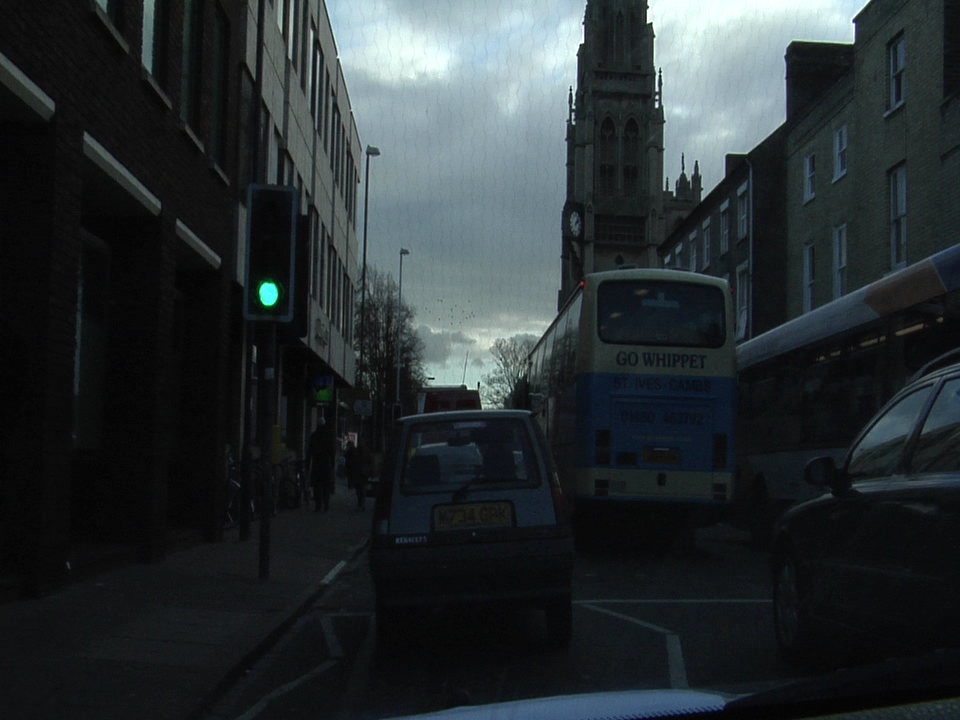

In [32]:
%matplotlib inline
import cv2
from google.colab.patches import  cv2_imshow

#img = cv2.imread(data_path/'train/0001TP_006690.png')
img = cv2.imread(str(data_path) + '/train/0001TP_006690.png')
cv2_imshow(img)

In [33]:
img.shape

(720, 960, 3)

In [34]:
import numpy as np
np.max(img)# 255, so image is not scaled

255

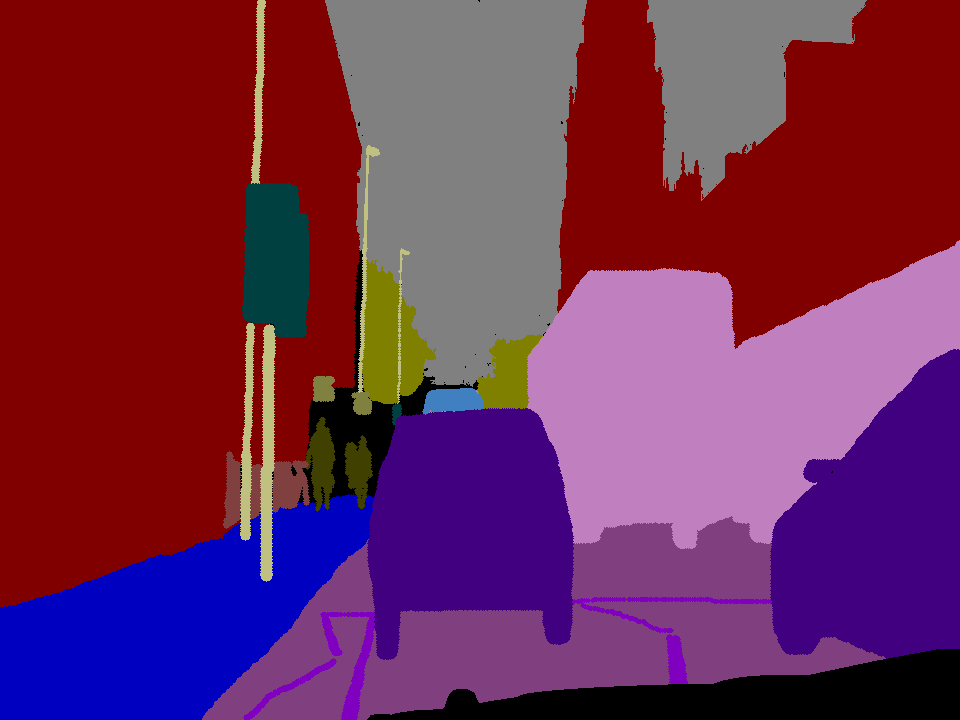

In [35]:
mask = cv2.imread(str(data_path) + '/train_labels/0001TP_006690_L.png')
cv2_imshow(mask)

In [36]:
mask.shape

(720, 960, 3)

In [37]:
mask# Colors are different from the classes dict! Because the order is BGR not RGB when using cv2.imread: https://stackoverflow.com/questions/46898979/how-to-check-the-channel-order-of-an-image

array([[[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128]],

       [[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128]],

       [[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128]],

       ...,

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

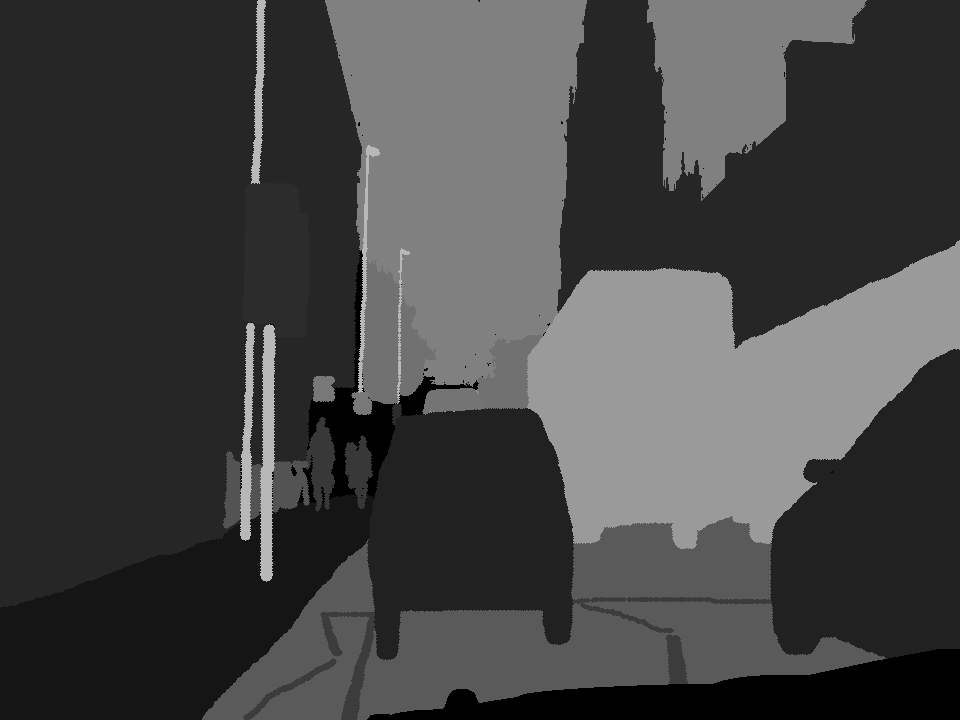

In [38]:
mask = cv2.imread(str(data_path) + '/train_labels/0001TP_006690_L.png', 0)
cv2_imshow(mask)

In [39]:
mask.shape

(720, 960)

In [40]:
mask

array([[38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38],
       ...,
       [21, 21, 21, ...,  0,  0,  0],
       [21, 21, 21, ...,  0,  0,  0],
       [21, 21, 21, ...,  0,  0,  0]], dtype=uint8)

In [41]:
np.max(mask)# Not 32 expected

184

In [42]:
np.min(mask)

0

Using TensorFlow backend.


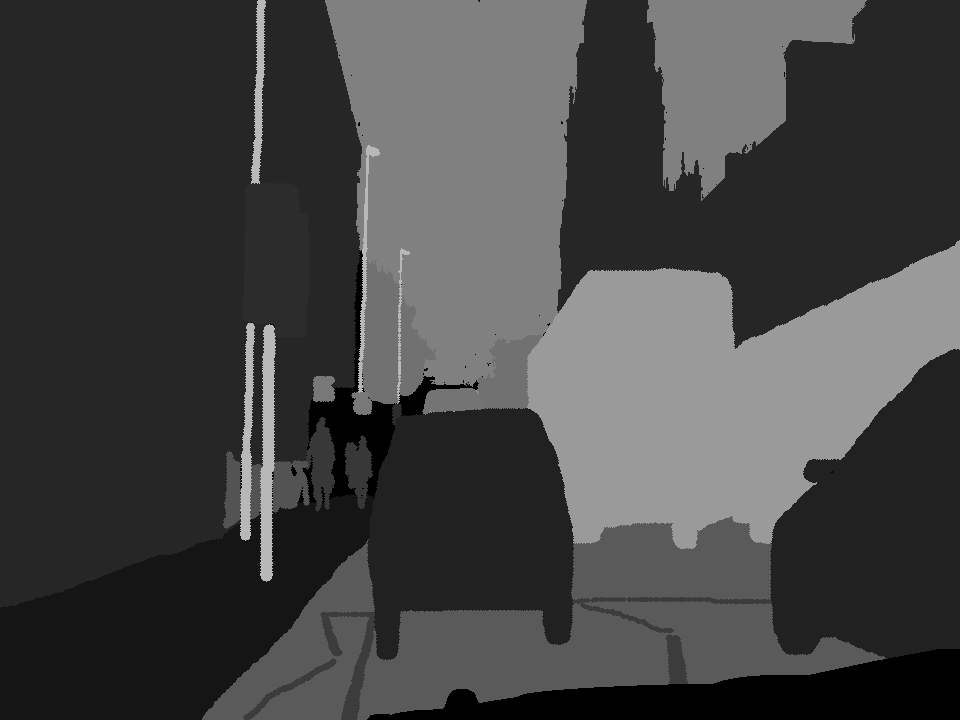

In [43]:
from keras.preprocessing.image import load_img
mask = load_img(str(data_path) + '/train_labels/0001TP_006690_L.png', color_mode='grayscale')
mask

In [44]:
np.max(mask)# Not 32 expected

184

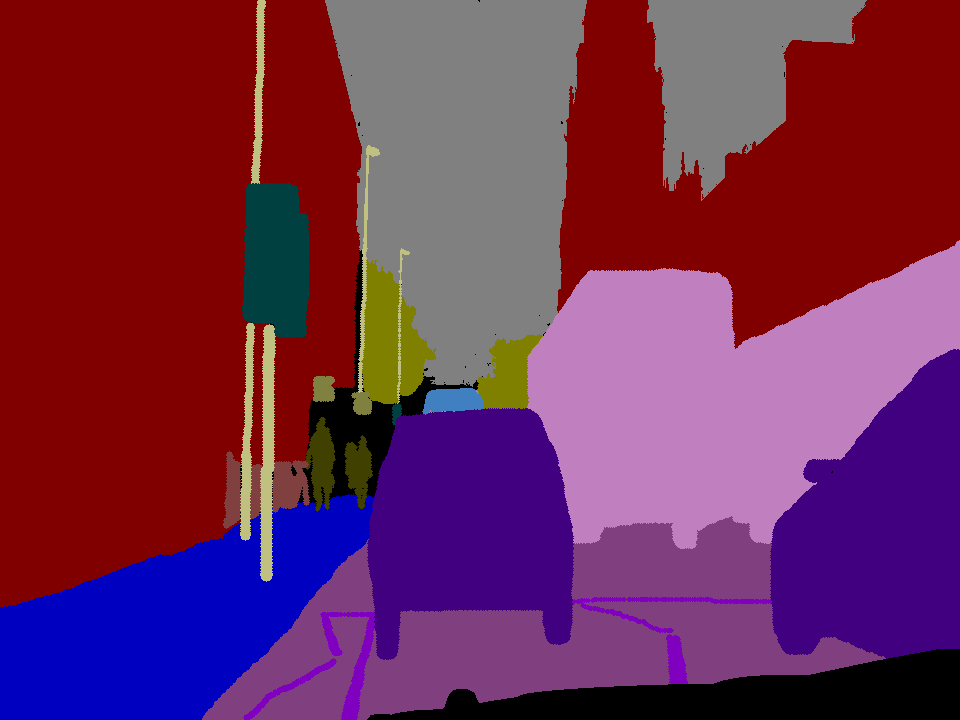

In [76]:
from keras.preprocessing.image import load_img
mask = load_img(str(data_path) + '/train_labels/0001TP_006690_L.png')
mask

In [0]:
mask = np.array(mask)# Now colors are the same as in the dict, since keras load_img uses RGB order.

In [78]:
mask.shape

(720, 960, 3)

In [79]:
rgb2idx['[0, 0, 0]']



30

In [80]:
eval('[0, 0, 0]')

[0, 0, 0]

In [81]:
idx2rgb={idx:np.array(eval(rgb)) for rgb, idx in rgb2idx.items()}
idx2rgb

{0: array([ 64, 128,  64]),
 1: array([192,   0, 128]),
 2: array([  0, 128, 192]),
 3: array([  0, 128,  64]),
 4: array([128,   0,   0]),
 5: array([ 64,   0, 128]),
 6: array([ 64,   0, 192]),
 7: array([192, 128,  64]),
 8: array([192, 192, 128]),
 9: array([ 64,  64, 128]),
 10: array([128,   0, 192]),
 11: array([192,   0,  64]),
 12: array([128, 128,  64]),
 13: array([192,   0, 192]),
 14: array([128,  64,  64]),
 15: array([ 64, 192, 128]),
 16: array([64, 64,  0]),
 17: array([128,  64, 128]),
 18: array([128, 128, 192]),
 19: array([  0,   0, 192]),
 20: array([192, 128, 128]),
 21: array([128, 128, 128]),
 22: array([ 64, 128, 192]),
 23: array([ 0,  0, 64]),
 24: array([ 0, 64, 64]),
 25: array([192,  64, 128]),
 26: array([128, 128,   0]),
 27: array([192, 128, 192]),
 28: array([64,  0, 64]),
 29: array([192, 192,   0]),
 30: array([0, 0, 0]),
 31: array([ 64, 192,   0])}

In [0]:

# To transform the mask img into (L,W,n_classes) instead of (L,W,3) since the mask is a colored image 
def map_pixel_to_class(p):
  return rgb2idx[str([int(pf) for pf in list(p)])]

new_mask = np.apply_along_axis(map_pixel_to_class, -1, mask)


In [83]:
new_mask

array([[ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       ...,
       [19, 19, 19, ..., 30, 30, 30],
       [19, 19, 19, ..., 30, 30, 30],
       [19, 19, 19, ..., 30, 30, 30]])

In [84]:
new_mask.shape

(720, 960)

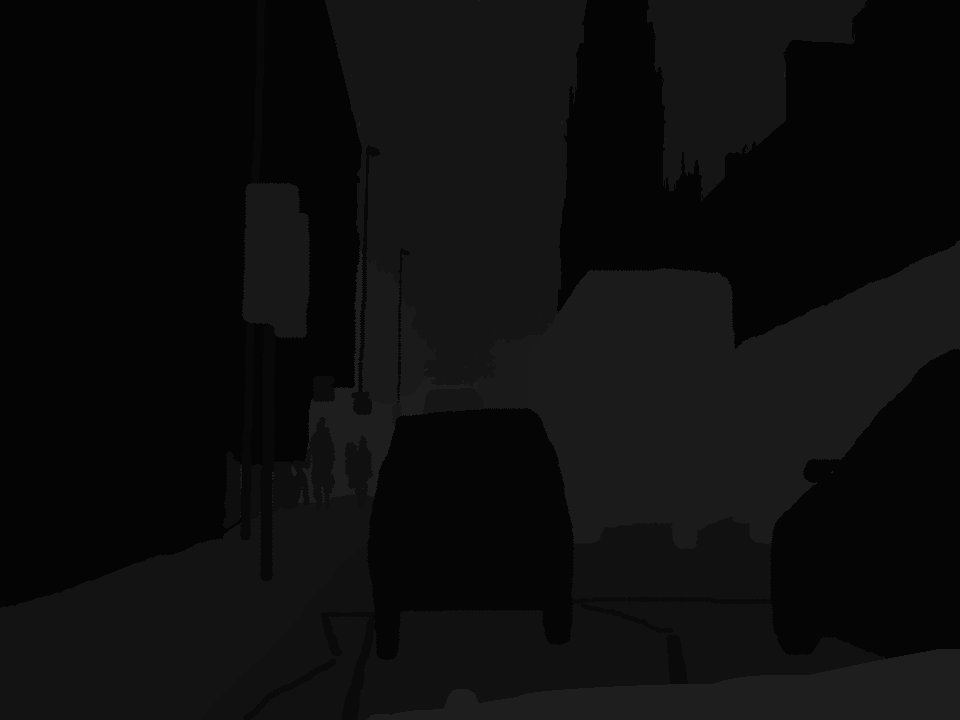

In [85]:
cv2_imshow(new_mask)

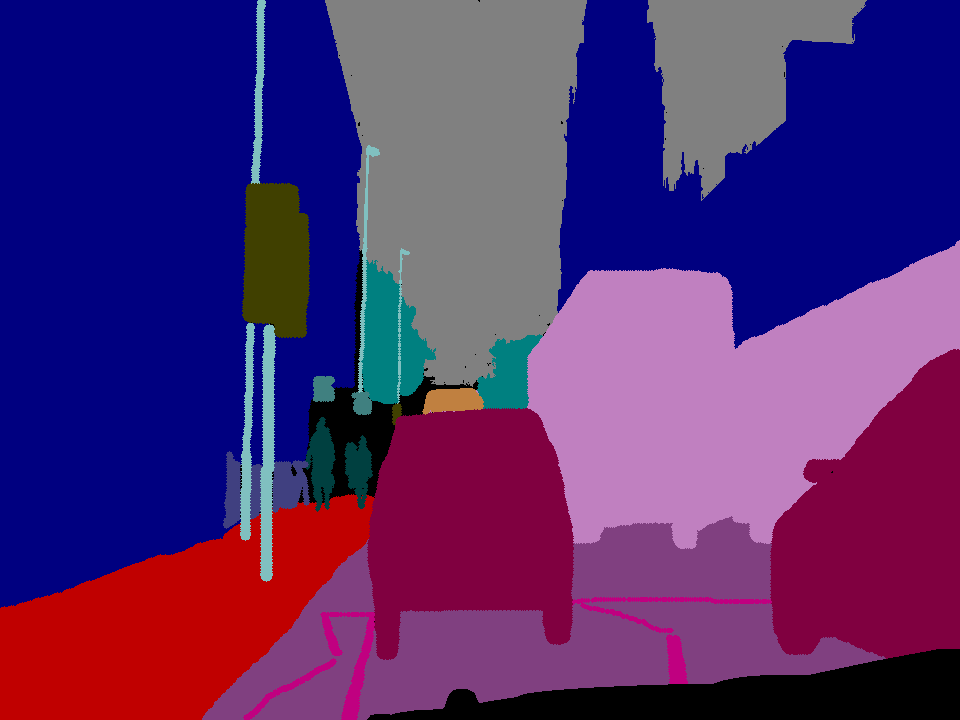

In [86]:
cv2_imshow(mask)

In [0]:
# Map the idx back to rgb
def map_class_to_rgb(p):
  
  return idx2rgb[p[0]]

rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(new_mask, -1))

In [90]:
rgb_mask.shape

(720, 960, 3)

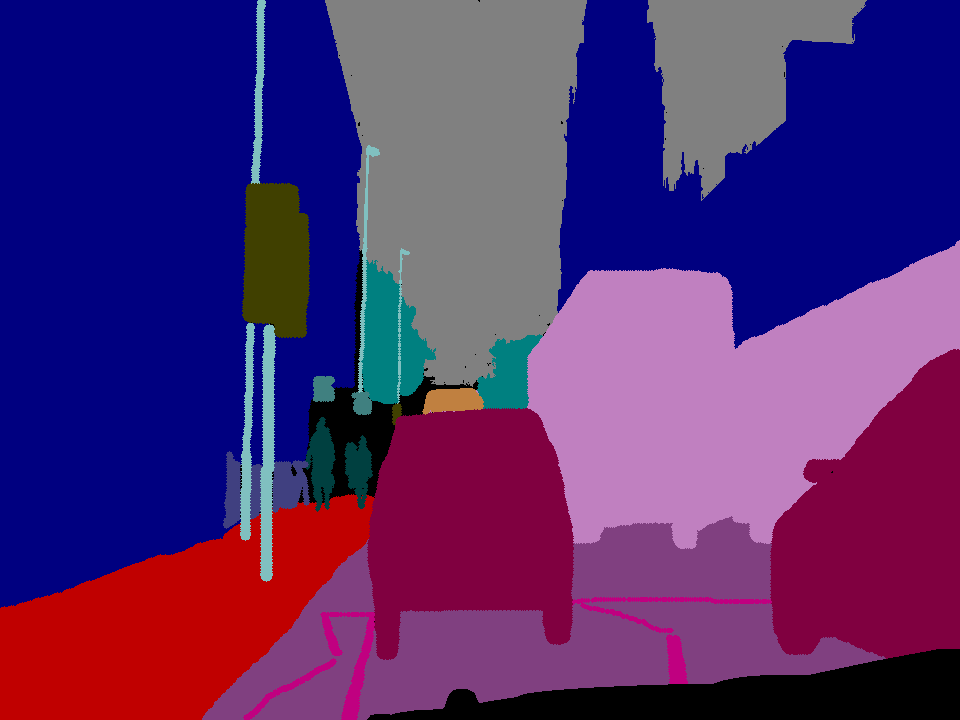

In [91]:
cv2_imshow(rgb_mask)

In [0]:
# We need to map the (720, 960, 3) mask into (720, 960, n_classes) each having the class index as OHE
def map_pixel_to_OHE_class(p):
  OHE = np.zeros(n_classes)
  OHE[rgb2idx[str([int(pf) for pf in list(p)])]] = 1
  return OHE

new_mask = np.apply_along_axis(map_pixel_to_OHE_class, 2, mask)

In [93]:
new_mask.shape

(720, 960, 32)

In [94]:
#cv2_imshow(new_mask)# Not possible since dim = 32

error: ignored

In [102]:
x = np.array([0,0,1,0])
np.where(x==1)[0][0]

2

In [0]:
def map_OHE_to_pixel(p):
  
  return idx2rgb[np.where(p==1)[0][0]]

rgb_mask = np.apply_along_axis(map_OHE_to_pixel, -1, new_mask)

In [105]:
rgb_mask.shape

(720, 960, 3)

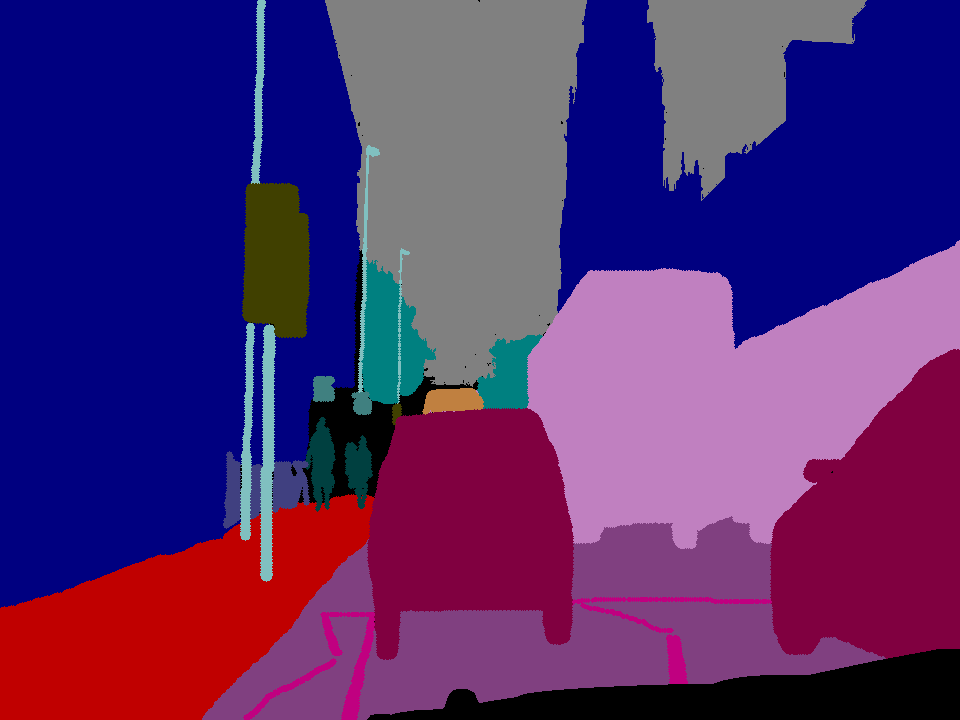

In [106]:
cv2_imshow(rgb_mask)

In [103]:
import os
os.listdir(str(data_path) + '/train_labels/')

['0016E5_06090_L.png',
 '0001TP_007950_L.png',
 '0016E5_05850_L.png',
 'Seq05VD_f05100_L.png',
 '0001TP_006750_L.png',
 '0016E5_06750_L.png',
 '0006R0_f03360_L.png',
 '0001TP_009390_L.png',
 '0001TP_009990_L.png',
 '0001TP_008220_L.png',
 'Seq05VD_f04860_L.png',
 '0006R0_f03330_L.png',
 '0001TP_007920_L.png',
 '0016E5_08037_L.png',
 '0016E5_06150_L.png',
 '0016E5_08059_L.png',
 '0016E5_00660_L.png',
 '0016E5_07260_L.png',
 '0016E5_07050_L.png',
 '0016E5_04590_L.png',
 '0006R0_f02040_L.png',
 '0001TP_006720_L.png',
 'Seq05VD_f03900_L.png',
 '0016E5_06390_L.png',
 '0016E5_01500_L.png',
 '0006R0_f03510_L.png',
 '0016E5_06690_L.png',
 '0016E5_07380_L.png',
 'Seq05VD_f00300_L.png',
 'Seq05VD_f01560_L.png',
 '0001TP_007320_L.png',
 'Seq05VD_f02730_L.png',
 '0016E5_08115_L.png',
 '0006R0_f03840_L.png',
 '0016E5_02070_L.png',
 '0016E5_08119_L.png',
 '0016E5_08075_L.png',
 'Seq05VD_f03930_L.png',
 'Seq05VD_f02130_L.png',
 '0016E5_08053_L.png',
 '0006R0_f03300_L.png',
 '0016E5_07979_L.png',
 '00

In [54]:
'''
masks = []
train_labels_path = str(data_path) + '/train_labels/'
for img in os.listdir(train_labels_path):
  print(os.path.join(train_labels_path,img))
  mask = load_img(os.path.join(train_labels_path,img))
  new_mask = np.apply_along_axis(map_pixel_to_OHE_class, 2, mask)
  masks.append(new_mask)
'''  

"\nmasks = []\ntrain_labels_path = str(data_path) + '/train_labels/'\nfor img in os.listdir(train_labels_path):\n  print(os.path.join(train_labels_path,img))\n  mask = load_img(os.path.join(train_labels_path,img))\n  new_mask = np.apply_along_axis(map_pixel_to_OHE_class, 2, mask)\n  masks.append(new_mask)\n"

# NPY

In [0]:
def load_CAMVID():
  train_img_path = str(data_path) + '/train/'
  train_labels_path = str(data_path) + '/train_labels/'
  x_train = np.array([np.array(load_img(str(train_img_path) + file)) for file in os.listdir(train_img_path)])
  #y_train = np.array([np.apply_along_axis(map_pixel_to_OHE_class, 2, np.array(load_img(str(train_labels_path) + file))) for file in os.listdir(train_labels_path)])
  y_train = np.array([np.apply_along_axis(map_pixel_to_class, 2, np.array(load_img(str(train_labels_path) + file))) for file in os.listdir(train_labels_path)])
  y_train = np.reshape(y_train.shape[0], y_train.shape[1]*y_train.shape[2], y_train.shape[3])
  return x_train, y_train
  

In [0]:
#train_img_path = str(data_path) + '/train/'
#x_train = np.array([np.array(load_img(str(train_img_path) + file)) for file in os.listdir(train_img_path)])

In [0]:
#x_train.shape

In [0]:
#train_labels_path = str(data_path) + '/train_labels/'
#y_train = np.array([np.apply_along_axis(map_pixel_to_class, 2, np.array(load_img(str(train_labels_path) + file))) for file in os.listdir(train_labels_path)])
#y_train = np.array([np.apply_along_axis(map_pixel_to_OHE_class, 2, np.array(load_img(str(train_labels_path) + file))) for file in os.listdir(train_labels_path)])

In [0]:
#y_train.shape

In [60]:
x_train, y_train = load_CAMVID()# Out of mem: 421x960x720x32x4bytes is around 34GB!
# To load in RAM we must use sparse_categorical. But sparse cat with softmax works on (samples, targets) or (samples, time, targets), o.w. it assumes OHE to work on axis=-1 of the y tensor.
# The solution is to flatten/Reshape the output of the model and the y to (256*256,1)

KeyboardInterrupt: ignored

In [0]:
print(x_train.shape)
print(y_train.shape)

# Model
__U-Net__

In [0]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv10 = Conv2D(n_classes, 1, activation = 'softmax')(conv9)
    '''
    conv10 = Conv2D(1, 1, activation = 'softmax')(conv9)# Using sparse_cat makes n_classes useless
    model = Model(input = inputs, output = conv10)
    '''
    
    
    conv10 = Conv2D(1, 1)(conv9)# Using sparse_cat makes n_classes useless
    output_layer = Reshape((256*256,), input_shape=(256, 256))(conv10)
    output_layer = Activation('softmax')(output_layer)

    model = Model(input = inputs, output = output_layer)
    
    
    
    

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model



In [0]:
model = unet()
model.summary()

In [0]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet_ohe(n_classes, pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(n_classes, 1, activation = 'softmax')(conv9)
   

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model



In [0]:
model_ohe = unet_ohe(n_classes=n_classes)
model_ohe.summary()

# Train

## Fit on NPY

In [0]:
model_ohe.fit(x=x_train, 
              y=y_train, 
              epochs=5)

In [0]:
# We need to map the (720, 960, 3) mask into (720, 960) each having the class index as in classes dict
def map_pixel_to_class(p):
  return rgb2idx[str([int(pf) for pf in list(p)])]


def adjust_mask(mask):
  # To transform the mask img into (L,W,n_classes) instead of (L,W,3) since the mask is a colored image
  # However, since we use sparse categorical loss, we dont need OHE, so we dont need (L,W,n_classes), only (L,W)

  
  new_mask = np.apply_along_axis(map_pixel_to_class, 2, mask)
  
  new_mask = np.expand_dims(new_mask, -1)# The model expects (L, W, 1)
  #print(new_mask.shape)
  return new_mask  
  

In [0]:
# Data generator
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(#rotation_range=0.2,
                    #width_shift_range=0.05,
                    #height_shift_range=0.05,
                    #shear_range=0.05,
                    #zoom_range=0.05,
                    #horizontal_flip=True,
                    #fill_mode='nearest',
                    rescale=1./255)
# Some transforms in the mask for data augmentation causes the standard colors to change, so they are not found in the mapping dict.
# So our usage here is as data loader instead of loading everything in RAM, not data augmentation
mask_gen_args = dict(#rotation_range=0.2,
                    #width_shift_range=0.05,
                    #height_shift_range=0.05,
                    #shear_range=0.05,
                    #zoom_range=0.05,
                    #horizontal_flip=True,
                    #fill_mode='nearest',
                    preprocessing_function=adjust_mask)# Using label adjustment as part of data generator works but slow. Better to keep it in npy files. 
                                                       # However, if the data is big, there's no other solution as we can't load them all in npy array.

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=32,
    target_size=(256,256))

mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    color_mode='rgb',
    batch_size=32,
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

'''
# We need this generator since we need to call adjust_mask to convert the colored image into a mask, and we cant use preprocessing_function of image data generator since it must return the same shape of the input image
def train_generator_fn(train_generator):
    for (img,mask) in train_generator:
        mask = adjust_mask(mask)
        yield (img, mask)
'''        

In [0]:

model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator,
                    steps_per_epoch=2000,# Remember we dont have constant data size due to augmentation and yield in the generator. If you dont have augmentation and just using flow_from_directory as a data loader, then set this to size/batch_size
                    epochs=5,
                    callbacks=[model_checkpoint])

In [0]:
next(image_generator)

In [0]:
# Error: could not broadcast input array from shape (256,256) into shape (256,256,3)
m = next(mask_generator)# this is because preprocessing_function must return the same shape as image

In [0]:
m.shape# in /usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py --> batch_x = np.zeros((len(index_array),) + self.image_shape, dtype=self.dtype)
# By broadcast rules: (256,256,1) is broadcasted to (256,256,3)

In [0]:
# Data generator
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(#rotation_range=0.2,
                    #width_shift_range=0.05,
                    #height_shift_range=0.05,
                    #shear_range=0.05,
                    #zoom_range=0.05,
                    #horizontal_flip=True,
                    #fill_mode='nearest',
                    rescale=1./255)

mask_gen_args = dict()#rotation_range=0.2,
                    #width_shift_range=0.05,
                    #height_shift_range=0.05,
                    #shear_range=0.05,
                    #zoom_range=0.05,
                    #horizontal_flip=True,
                    #fill_mode='nearest',
                    #preprocessing_function=adjust_mask)# This is not possible since the preprocessing_function can only return the same shape as image

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=2,
    target_size=(256,256))

mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    batch_size=2,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

def adjust_batch_mask(mask):
  # To transform the mask img into (L,W,n_classes) instead of (L,W,3) since the mask is a colored image
  # However, since we use sparse categorical loss, we dont need OHE, so we dont need (L,W,n_classes), only (L,W)

  new_mask = np.apply_along_axis(map_pixel_to_class, 3, mask)# Since we are passing a complete batch here, the index of pixels is shifted to 4th pos (3)
  return new_mask  

def adjust_batch_OHE_mask(mask):
  # To transform the mask img into (L,W,n_classes) instead of (L,W,3) since the mask is a colored image
  # We need to map the (720, 960, 3) mask into (720, 960, n_classes) each having the class index as OHE
  def map_pixel_to_class(p):
    OHE = np.zeros(n_classes)
    OHE[rgb2idx[str([int(pf) for pf in list(p)])]] = 1
    return OHE    
  new_mask = np.apply_along_axis(map_pixel_to_class, 3, mask)# Since we are passing a complete batch here, the index of pixels is shifted to 4th pos (3)
  return new_mask  

  
# We need this generator since we need to call adjust_mask to convert the colored image into a mask, and we cant use preprocessing_function of image data generator since it must return the same shape of the input image
def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_batch_mask(mask)
        new_mask = np.expand_dims(new_mask, -1)# The model expects (batch_sz, L, W, 1)
        yield (img,new_mask)
        
def train_generator_OHE_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_batch_OHE_mask(mask)
        #new_mask = np.expand_dims(new_mask, -1)# The model expects (batch_sz, L, W, 1)
        yield (img,new_mask)        

In [0]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),# don't use gen here, as you already called next(gen) so consumed 1 iteration
                    steps_per_epoch=2000,
                    epochs=5,
                    callbacks=[model_checkpoint])# Loss is nan with sparse categorical

In [0]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model_ohe.fit_generator(train_generator_OHE_fn(),# don't use gen here, as you already called next(gen) so consumed 1 iteration
                    steps_per_epoch=2000,
                    epochs=5,
                    callbacks=[model_checkpoint])